### Gathering Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_excel("datasets.xlsx", sheet_name="Worksheet")

print(data)

            wilayah_bptd      status_pemeriksaan  tahun     satuan  jumlah
0              BPTD Aceh               Diperiksa   2022  Kendaraan  5325.0
1              BPTD Aceh               Diperiksa   2023  Kendaraan     NaN
2              BPTD Aceh               Melanggar   2022  Kendaraan  2298.0
3              BPTD Aceh               Melanggar   2023  Kendaraan     NaN
4              BPTD Aceh  Persentase Pelanggaran   2022     Persen    43.0
..                   ...                     ...    ...        ...     ...
133  BPTD Sumatera Utara               Diperiksa   2023  Kendaraan     NaN
134  BPTD Sumatera Utara               Melanggar   2022  Kendaraan  4436.0
135  BPTD Sumatera Utara               Melanggar   2023  Kendaraan     NaN
136  BPTD Sumatera Utara  Persentase Pelanggaran   2022     Persen    78.0
137  BPTD Sumatera Utara  Persentase Pelanggaran   2023     Persen     NaN

[138 rows x 5 columns]


##### Cek Missing Value

In [2]:
data.isnull().sum()

wilayah_bptd           0
status_pemeriksaan     0
tahun                  0
satuan                 0
jumlah                69
dtype: int64

Melakukan Dropping Data Pada Missing Value

In [3]:
data.dropna(axis=0, inplace=True)

print(data)

                        wilayah_bptd      status_pemeriksaan  tahun  \
0                          BPTD Aceh               Diperiksa   2022   
2                          BPTD Aceh               Melanggar   2022   
4                          BPTD Aceh  Persentase Pelanggaran   2022   
6    BPTD Bali & Nusa Tenggara Barat               Diperiksa   2022   
8    BPTD Bali & Nusa Tenggara Barat               Melanggar   2022   
..                               ...                     ...    ...   
128            BPTD Sumatera Selatan               Melanggar   2022   
130            BPTD Sumatera Selatan  Persentase Pelanggaran   2022   
132              BPTD Sumatera Utara               Diperiksa   2022   
134              BPTD Sumatera Utara               Melanggar   2022   
136              BPTD Sumatera Utara  Persentase Pelanggaran   2022   

        satuan   jumlah  
0    Kendaraan   5325.0  
2    Kendaraan   2298.0  
4       Persen     43.0  
6    Kendaraan  12201.0  
8    Kendaraan   

##### Cek Duplicate Data

In [4]:
duplicate = data.duplicated().sum()

print('Data Duplicate :', duplicate)

Data Duplicate : 0


##### Cek Outliner

Jumlah Outliners: 8


<Axes: xlabel='jumlah'>

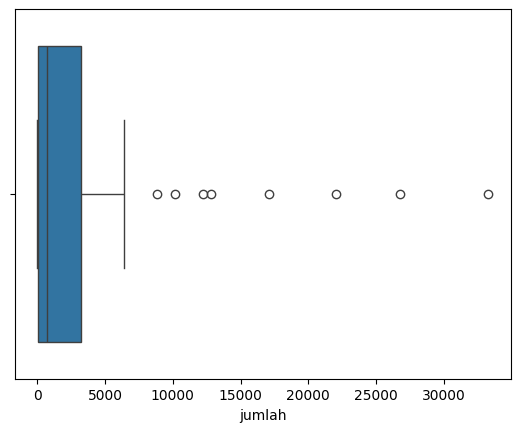

In [5]:
Q1 = np.percentile(data['jumlah'], 25) 
Q3 = np.percentile(data['jumlah'],75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
minimum = Q1 - cut_off
maximum = Q3 + cut_off

outliners = [x for x in data['jumlah'] if x < minimum or x > maximum]
print('Jumlah Outliners: %d' % len(outliners))
sns.boxplot(x=data['jumlah'])


Melakukan Imputation Data Pada Data Outliners

Jumlah Outliners: 0


<Axes: xlabel='jumlah'>

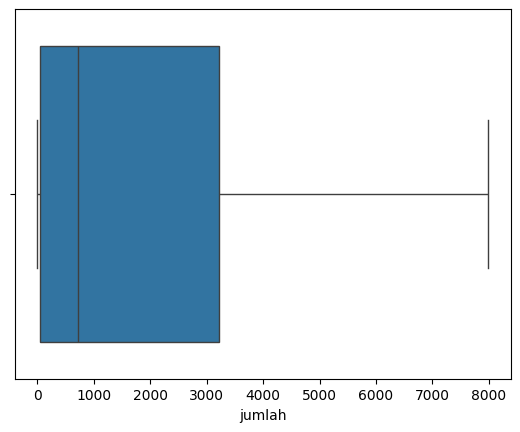

In [6]:
lower_than = data['jumlah'] < minimum
more_than = data['jumlah'] > maximum

data['jumlah'] = data['jumlah'].mask(lower_than, minimum) # Mengatasi Outliners 
data['jumlah'] = data['jumlah'].mask(more_than, maximum) # Mengatasi Outliners 

outliners = [x for x in data['jumlah'] if x < minimum or x > maximum]
print('Jumlah Outliners: %d' % len(outliners))
sns.boxplot(x=data['jumlah'])
# data.to_excel("datasets_fixed.xlsx", sheet_name="Worksheet", index=False)

### Perbandingan Jumlah Yang Diperiksa Dan Jumlah Yang Melanggar Per Wilayah

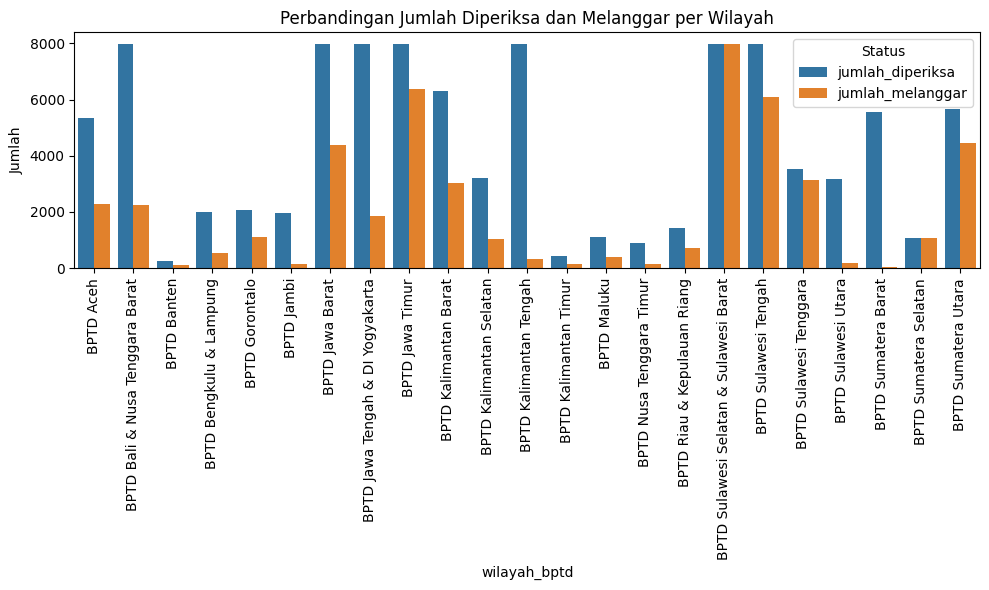

In [7]:
import matplotlib.pyplot as plt

# Filter data untuk status pemeriksaan "Diperiksa" dan "Melanggar"
diperiksa = data[data['status_pemeriksaan'] == 'Diperiksa']
melanggar = data[data['status_pemeriksaan'] == 'Melanggar']

# Gabungkan data diperiksa dan melanggar
comparison = pd.merge(diperiksa[['wilayah_bptd', 'jumlah']], melanggar[['wilayah_bptd', 'jumlah']], 
                      on='wilayah_bptd', how='inner', suffixes=('_diperiksa', '_melanggar'))

comparison_melt = comparison.melt(id_vars="wilayah_bptd", value_vars=["jumlah_diperiksa", "jumlah_melanggar"], 
                                  var_name="Status", value_name="Jumlah")

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melt, x="wilayah_bptd", y="Jumlah", hue="Status")
plt.xticks(rotation=90)
plt.title('Perbandingan Jumlah Diperiksa dan Melanggar per Wilayah')
plt.tight_layout()
plt.show()


### Perbandingan Berapa Persen Kendaraan Yang Melanggar Dari Yang DiPeriksa

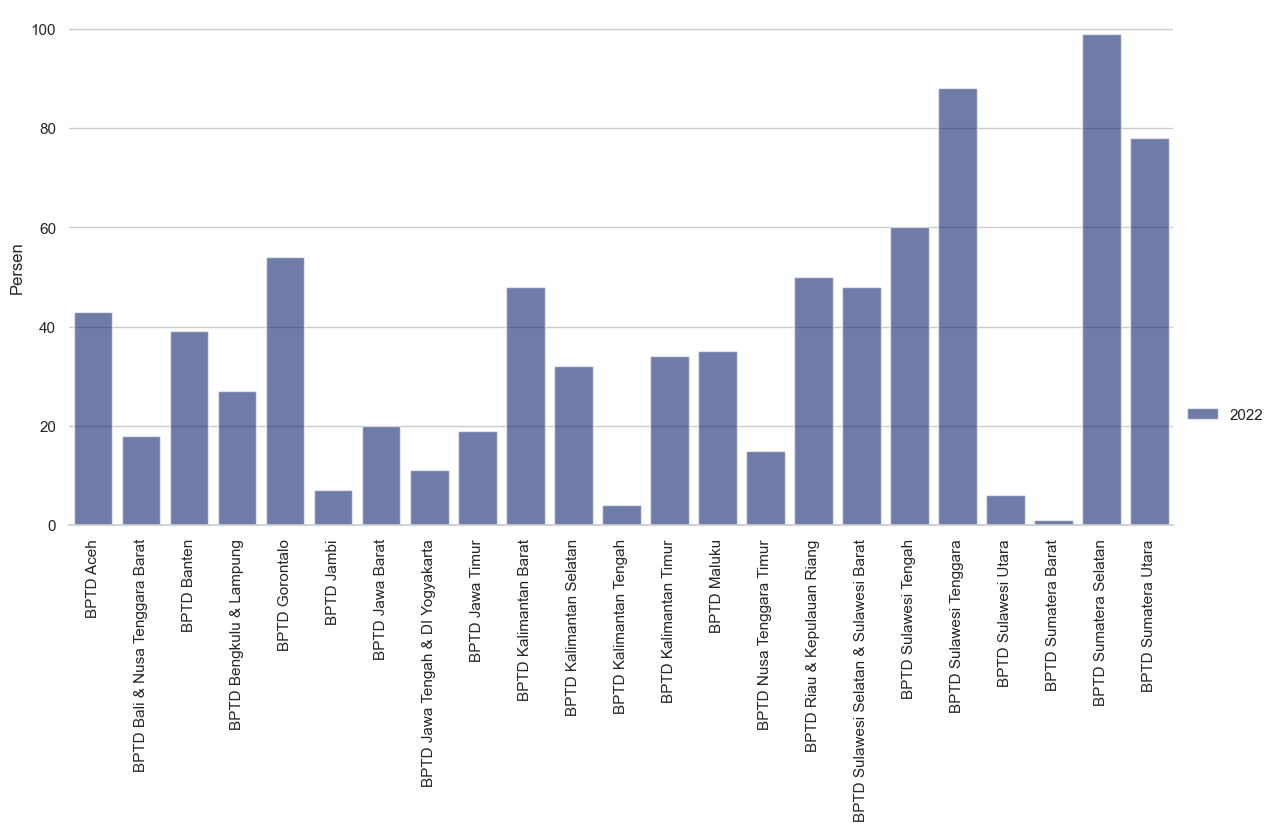

In [8]:
sns.set_theme(style="whitegrid")

persen = data[data['satuan'] == 'Persen']

g = sns.catplot(
    data=persen, kind="bar",
    x=persen['wilayah_bptd'], y=persen['jumlah'], hue=persen['tahun'],
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=2
)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set_axis_labels("", "Persen")
g.legend.set_title("")